In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('indian_liver_patient.csv')

In [3]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [4]:
print(df.dtypes)
print('\n',df.shape)
print('\n',df.isnull().sum())

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase          float64
Alamine_Aminotransferase      float64
Aspartate_Aminotransferase    float64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

 (583, 11)

 Age                           0
Gender                        3
Total_Bilirubin               0
Direct_Bilirubin              1
Alkaline_Phosphotase          2
Alamine_Aminotransferase      2
Aspartate_Aminotransferase    3
Total_Protiens                0
Albumin                       1
Albumin_and_Globulin_Ratio    5
Dataset                       0
dtype: int64


In [5]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,582.000000,581.000000,581.000000,580.000000,583.000000,582.000000,578.000000,583.000000
mean,44.746141,3.298799,1.488144,290.254733,80.542169,110.156897,6.483190,3.141753,0.946972,1.286449
std,16.189833,6.209522,2.810482,242.925760,182.835984,289.641517,1.085451,0.796199,0.319861,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [6]:
df.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.011763,0.008405,0.082847,-0.088575,-0.019512,-0.187461,-0.267588,-0.216304,-0.137351
Total_Bilirubin,0.011763,1.000000,0.874584,0.206548,0.217280,0.237673,-0.008099,-0.222232,-0.207588,-0.220208
Direct_Bilirubin,0.008405,0.874584,1.000000,0.234967,0.238997,0.257283,0.000207,-0.228335,-0.201501,-0.245464
Alkaline_Phosphotase,0.082847,0.206548,0.234967,1.000000,0.127157,0.167136,-0.029413,-0.162807,-0.230289,-0.184480
Alamine_Aminotransferase,-0.088575,0.217280,0.238997,0.127157,1.000000,0.791742,-0.042752,-0.029800,-0.001708,-0.163022
Aspartate_Aminotransferase,-0.019512,0.237673,0.257283,0.167136,0.791742,1.000000,-0.026411,-0.085835,-0.073356,-0.152216
Total_Protiens,-0.187461,-0.008099,0.000207,-0.029413,-0.042752,-0.026411,1.000000,0.784247,0.235261,0.035008
Albumin,-0.267588,-0.222232,-0.228335,-0.162807,-0.029800,-0.085835,0.784247,1.000000,0.689957,0.161536
Albumin_and_Globulin_Ratio,-0.216304,-0.207588,-0.201501,-0.230289,-0.001708,-0.073356,0.235261,0.689957,1.000000,0.163373
Dataset,-0.137351,-0.220208,-0.245464,-0.184480,-0.163022,-0.152216,0.035008,0.161536,0.163373,1.000000


In [7]:
df.groupby('Dataset').median()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
Dataset,,,,,,,,,
1,46.0,1.4,0.5,229.0,41.0,53.0,6.55,3.0,0.9
2,40.0,0.8,0.2,186.0,27.0,29.0,6.60,3.4,1.0


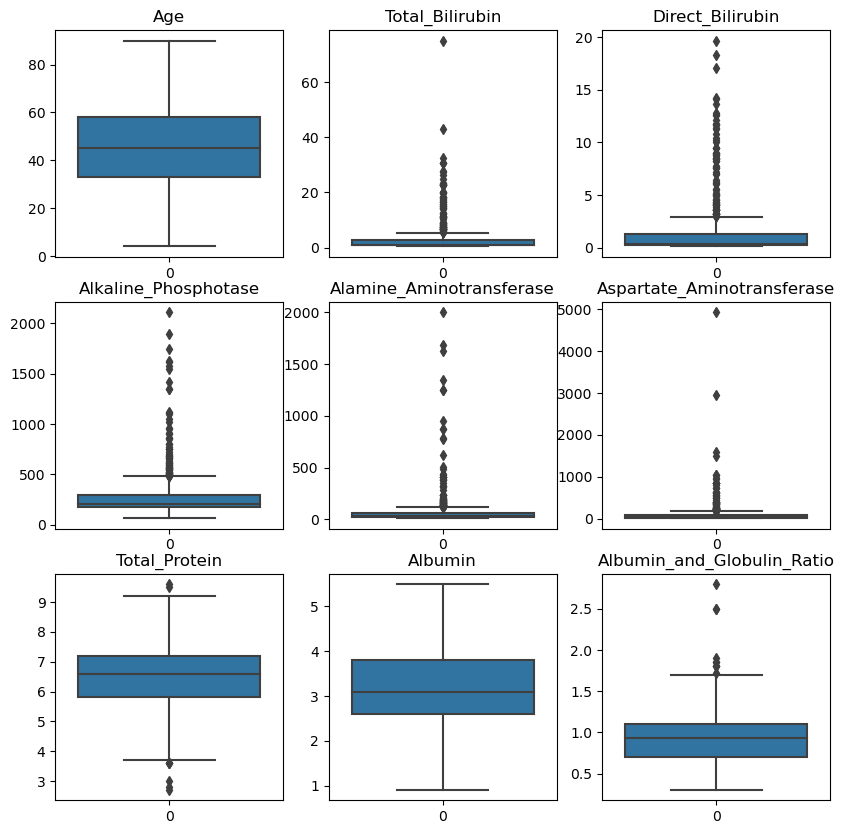

In [8]:
figure=plt.figure(figsize=(10,10))

plt.subplot(3,3,1)
plt.title('Age')
sns.boxplot(df['Age'])

plt.subplot(3,3,2)
sns.boxplot(df['Total_Bilirubin'])
plt.title('Total_Bilirubin')

plt.subplot(3,3,3)
sns.boxplot(df['Direct_Bilirubin'])
plt.title('Direct_Bilirubin')

plt.subplot(3,3,4)
sns.boxplot(df['Alkaline_Phosphotase'])
plt.title('Alkaline_Phosphotase')

plt.subplot(3,3,5)
sns.boxplot(df['Alamine_Aminotransferase'])
plt.title('Alamine_Aminotransferase')

plt.subplot(3,3,6)
sns.boxplot(df['Aspartate_Aminotransferase'])
plt.title('Aspartate_Aminotransferase')

plt.subplot(3,3,7)
sns.boxplot(df['Total_Protiens'])
plt.title('Total_Protein')

plt.subplot(3,3,8)
sns.boxplot(df['Albumin'])
plt.title('Albumin')

plt.subplot(3,3,9)
sns.boxplot(df['Albumin_and_Globulin_Ratio'])
plt.title('Albumin_and_Globulin_Ratio')
/
plt.plot
plt.show()

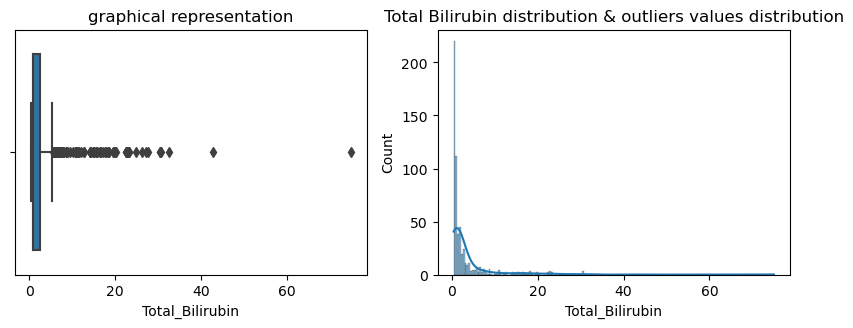

In [9]:
figure= plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
sns.boxplot(df,x='Total_Bilirubin')
plt.title('graphical representation')
plt.subplot(2,2,2)
sns.histplot(df,x='Total_Bilirubin',kde=True)
plt.title('Total Bilirubin distribution & outliers values distribution')

plt.plot()
plt.show()

it seems many attributes contain outliers let us check their distribution 

The distribution of Total bilirubin is not gaussian distribution intead it is rightward skewed.

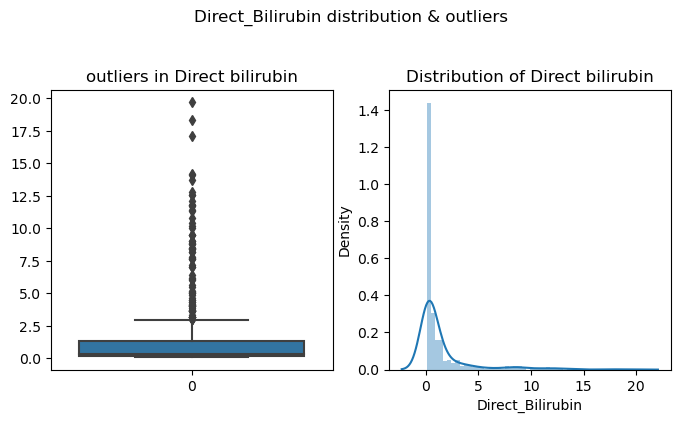

In [10]:
figure=plt.figure(figsize=(8,8))
plt.suptitle('Direct_Bilirubin distribution & outliers')
plt.subplot(2,2,1)
sns.boxplot(df['Direct_Bilirubin'])
plt.title('outliers in Direct bilirubin')
plt.subplot(2,2,2)
sns.distplot(df['Direct_Bilirubin'])
plt.title('Distribution of Direct bilirubin')
plt.plot
plt.show()

Direct bilirubin attribute contain to many outliers & distribution is also abnormal..

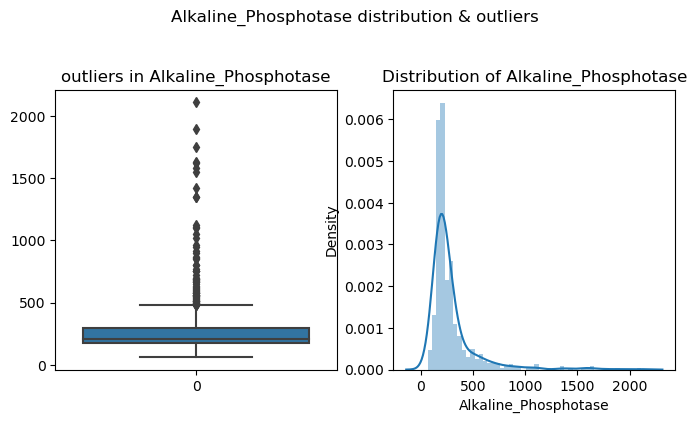

In [11]:

figure=plt.figure(figsize=(8,8))
plt.suptitle('Alkaline_Phosphotase distribution & outliers')
plt.subplot(2,2,1)
sns.boxplot(df['Alkaline_Phosphotase'])
plt.title('outliers in Alkaline_Phosphotase')
plt.subplot(2,2,2)
sns.distplot(df['Alkaline_Phosphotase'])
plt.title('Distribution of Alkaline_Phosphotase')
plt.plot
plt.show()

alkaline phosphate contain rightward skewed distribution with to many outliers

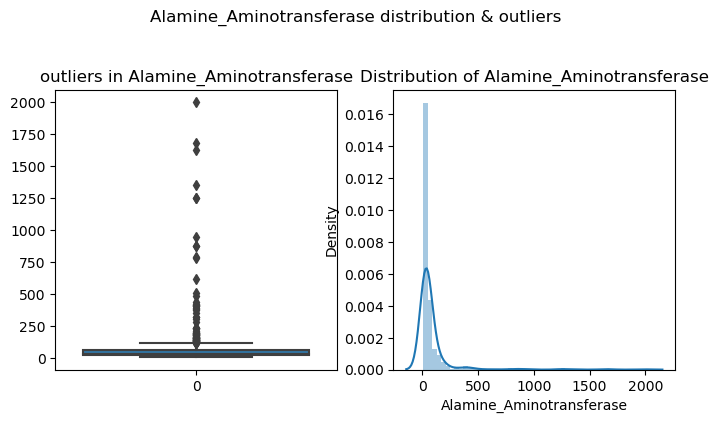

In [12]:
figure=plt.figure(figsize=(8,8))
plt.suptitle('Alamine_Aminotransferase distribution & outliers')
plt.subplot(2,2,1)
sns.boxplot(df['Alamine_Aminotransferase'])
plt.title('outliers in Alamine_Aminotransferase')
plt.subplot(2,2,2)
sns.distplot(df['Alamine_Aminotransferase'])
plt.title('Distribution of Alamine_Aminotransferase')
plt.plot
plt.show()

alamine aminotransferese contain rightward skewed distribution with to many outliers..

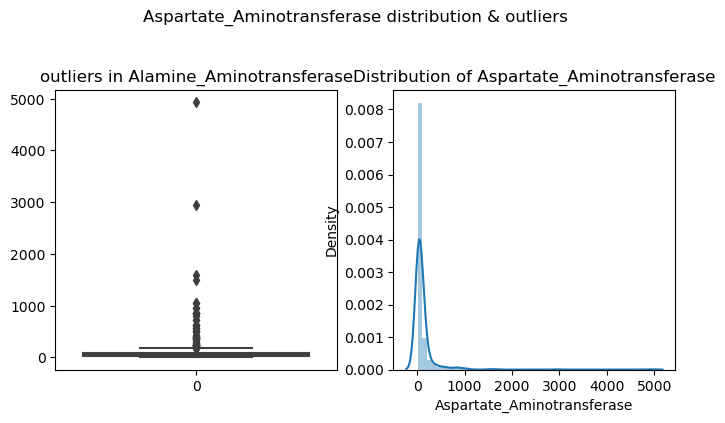

In [13]:
figure=plt.figure(figsize=(8,8))
plt.suptitle('Aspartate_Aminotransferase distribution & outliers')
plt.subplot(2,2,1)
sns.boxplot(df['Aspartate_Aminotransferase'])
plt.title('outliers in Alamine_Aminotransferase')
plt.subplot(2,2,2)
sns.distplot(df['Aspartate_Aminotransferase'])
plt.title('Distribution of Aspartate_Aminotransferase')
plt.plot
plt.show()

asperate aminotransferese contain rightward skewed distribution with to many outliers..

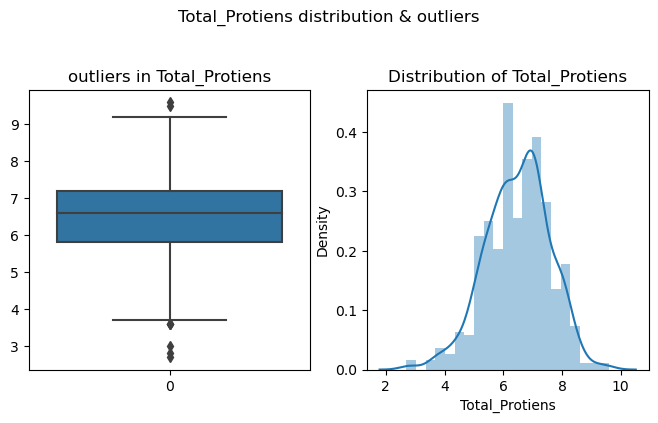

In [14]:
figure=plt.figure(figsize=(8,8))
plt.suptitle('Total_Protiens distribution & outliers')
plt.subplot(2,2,1)
sns.boxplot(df['Total_Protiens'])
plt.title('outliers in Total_Protiens')
plt.subplot(2,2,2)
sns.distplot(df['Total_Protiens'])
plt.title('Distribution of Total_Protiens')
plt.plot
plt.show()

Total Protein contain slightlyleftward skewed distribution with to many outliers..

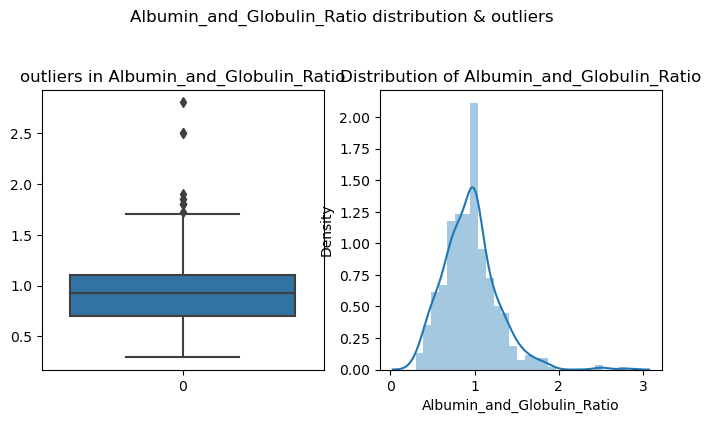

In [15]:
figure=plt.figure(figsize=(8,8))
plt.suptitle('Albumin_and_Globulin_Ratio distribution & outliers')
plt.subplot(2,2,1)
sns.boxplot(df['Albumin_and_Globulin_Ratio'])
plt.title('outliers in Albumin_and_Globulin_Ratio')
plt.subplot(2,2,2)
sns.distplot(df['Albumin_and_Globulin_Ratio'])
plt.title('Distribution of Albumin_and_Globulin_Ratio')
plt.plot
plt.show()

albumin & globulin ratio contain rightward skewed distribution with to many outliers..

In [16]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [17]:
df['Dataset'].value_counts()

1    416
2    167
Name: Dataset, dtype: int64

In [18]:
df['Dataset']=df['Dataset'].replace({2:0})

In [19]:
df['Dataset'].value_counts()

1    416
0    167
Name: Dataset, dtype: int64

1's are liver patient

2's are healthy person

### let us handle outliers

floor value is 0.6 
 ceiling value is 20.107999999999993
__________________________________________________________________________________________
0       0.7
1      10.9
2       7.3
3       1.0
4       3.9
       ... 
578     0.6
579     0.6
580     0.8
581     1.3
582     1.0
Name: Total_Bilirubin, Length: 583, dtype: float64 ____________________________________________________________________________________________________________________________________________________________________________________


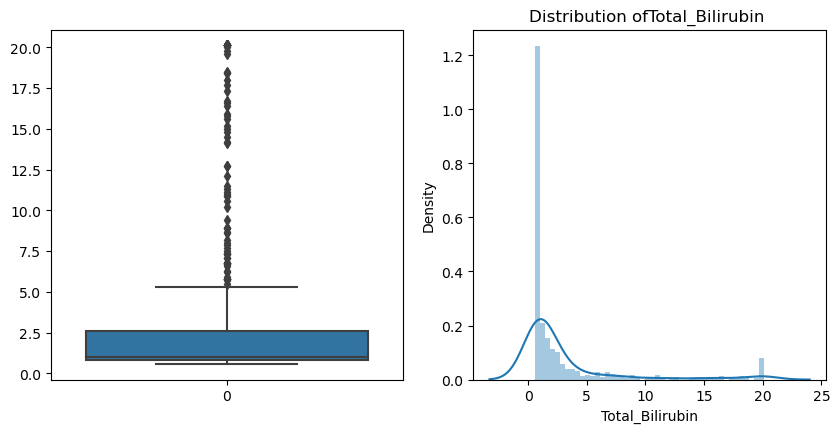

In [20]:
floor=df['Total_Bilirubin'].quantile(0.03)
ceil=df['Total_Bilirubin'].quantile(0.97)
print('floor value is',floor,'\n ceiling value is',ceil)
print('___'*30)
df['Total_Bilirubin']=np.where(df['Total_Bilirubin']>ceil,ceil,
                               np.where(df['Total_Bilirubin']<floor,floor,df['Total_Bilirubin']))
print(df['Total_Bilirubin'],'___'*60)

figure=plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(df['Total_Bilirubin'])
plt.subplot(2,2,2)
sns.distplot(df['Total_Bilirubin'])
plt.title('Distribution ofTotal_Bilirubin ')
plt.plot
plt.show()


floor value is 0.1 
 ceiling value is 10.113999999999987
__________________________________________________________________________________________
0      0.1
1      5.5
2      4.1
3      0.4
4      2.0
      ... 
578    0.1
579    0.1
580    0.2
581    0.5
582    0.3
Name: Direct_Bilirubin, Length: 583, dtype: float64 ______________________________________________________________________________________________________________________________________________________


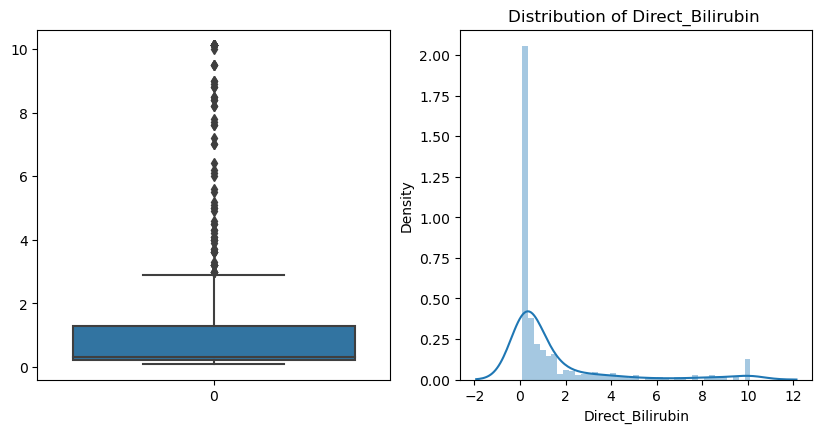

In [21]:
floor=df['Direct_Bilirubin'].quantile(0.03)
ceil=df['Direct_Bilirubin'].quantile(0.97)
print('floor value is',floor,'\n ceiling value is',ceil)
print('___'*30)
df['Direct_Bilirubin']=np.where(df['Direct_Bilirubin']>ceil,ceil,
                               np.where(df['Direct_Bilirubin']<floor,floor,df['Direct_Bilirubin']))
print(df['Direct_Bilirubin'],"___"*50)

figure=plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(df['Direct_Bilirubin'])
plt.subplot(2,2,2)
sns.distplot(df['Direct_Bilirubin'])
plt.title('Distribution of Direct_Bilirubin ')
plt.plot
plt.show()

floor value is 115.4 
 ceiling value is 909.4000000000003
__________________________________________________________________________________________
0      187.0
1      699.0
2      490.0
3      182.0
4      195.0
       ...  
578    500.0
579    115.4
580    245.0
581    184.0
582    216.0
Name: Alkaline_Phosphotase, Length: 583, dtype: float64 ______________________________________________________________________________________________________________________________________________________


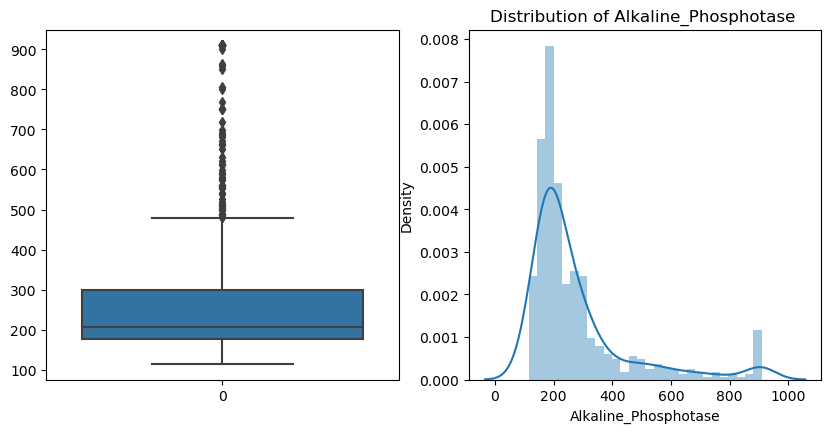

In [22]:
floor=df['Alkaline_Phosphotase'].quantile(0.03)
ceil=df['Alkaline_Phosphotase'].quantile(0.97)
print('floor value is',floor,'\n ceiling value is',ceil)
print('___'*30)
df['Alkaline_Phosphotase']=np.where(df['Alkaline_Phosphotase']>ceil,ceil,
                               np.where(df['Alkaline_Phosphotase']<floor,floor,df['Alkaline_Phosphotase']))
print(df['Alkaline_Phosphotase'],'___'*50)

figure=plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(df['Alkaline_Phosphotase'])
plt.subplot(2,2,2)
sns.distplot(df['Alkaline_Phosphotase'])
plt.title('Distribution of Alkaline_Phosphotase ')
plt.plot
plt.show()

floor value is 13.0 
 ceiling value is 410.0000000000001
______________________________________________________________________________________________________________________________________________________
0      16.0
1      64.0
2      60.0
3      14.0
4      27.0
       ... 
578    20.0
579    35.0
580    48.0
581    29.0
582    21.0
Name: Alamine_Aminotransferase, Length: 583, dtype: float64 ______________________________________________________________________________________________________________________________________________________


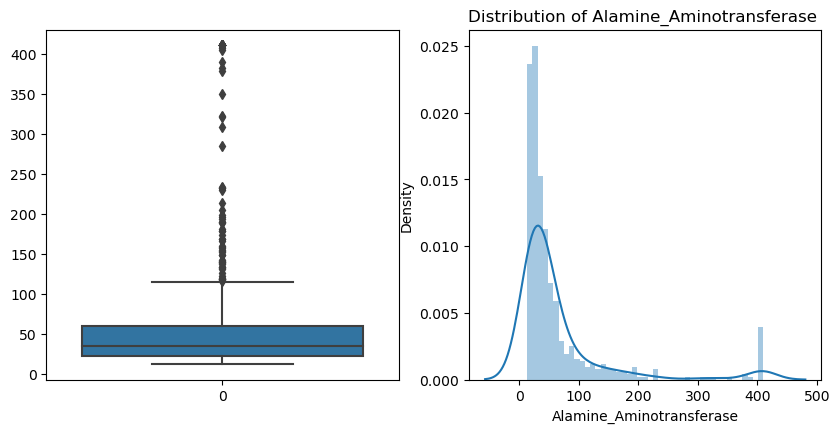

In [23]:
floor=df['Alamine_Aminotransferase'].quantile(0.03)
ceil=df['Alamine_Aminotransferase'].quantile(0.97)
print('floor value is',floor,'\n ceiling value is',ceil)
print('___'*50)
df['Alamine_Aminotransferase']=np.where(df['Alamine_Aminotransferase']>ceil,ceil,
                               np.where(df['Alamine_Aminotransferase']<floor,floor,df['Alamine_Aminotransferase']))
print(df['Alamine_Aminotransferase'],'___'*50)

figure=plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(df['Alamine_Aminotransferase'])
plt.subplot(2,2,2)
sns.distplot(df['Alamine_Aminotransferase'])
plt.title('Distribution of Alamine_Aminotransferase ')
plt.plot
plt.show()

floor value is 14.0 
 ceiling value is 627.41
______________________________________________________________________________________________________________________________________________________
0       18.0
1      100.0
2       68.0
3       20.0
4       59.0
       ...  
578     34.0
579     31.0
580     49.0
581     32.0
582     24.0
Name: Aspartate_Aminotransferase, Length: 583, dtype: float64 ______________________________________________________________________________________________________________________________________________________


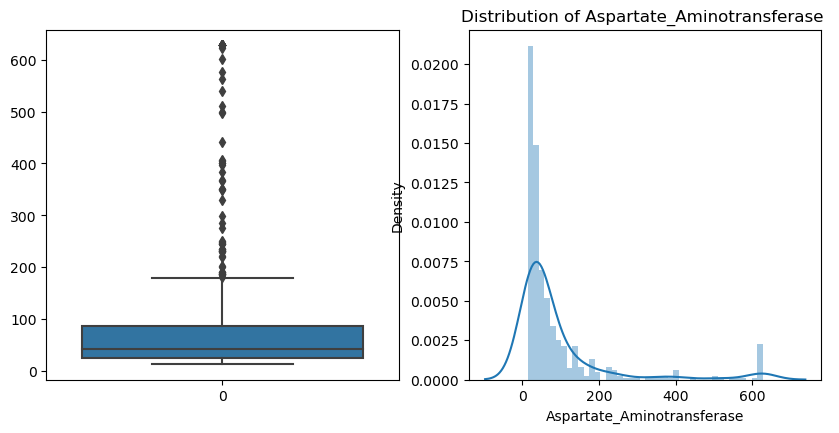

In [24]:
floor=df['Aspartate_Aminotransferase'].quantile(0.03)
ceil=df['Aspartate_Aminotransferase'].quantile(0.97)
print('floor value is',floor,'\n ceiling value is',ceil)
print('___'*50)
df['Aspartate_Aminotransferase']=np.where(df['Aspartate_Aminotransferase']>ceil,ceil,
                               np.where(df['Aspartate_Aminotransferase']<floor,floor,df['Aspartate_Aminotransferase']))
print(df['Aspartate_Aminotransferase'],'___'*50)

figure=plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(df['Aspartate_Aminotransferase'])
plt.subplot(2,2,2)
sns.distplot(df['Aspartate_Aminotransferase'])
plt.title('Distribution of Aspartate_Aminotransferase ')
plt.plot
plt.show()

floor value is 4.346 
 ceiling value is 8.3
______________________________________________________________________________________________________________________________________________________
0      6.8
1      7.5
2      7.0
3      6.8
4      7.3
      ... 
578    5.9
579    6.0
580    6.4
581    6.8
582    7.3
Name: Total_Protiens, Length: 583, dtype: float64 ______________________________________________________________________________________________________________________________________________________


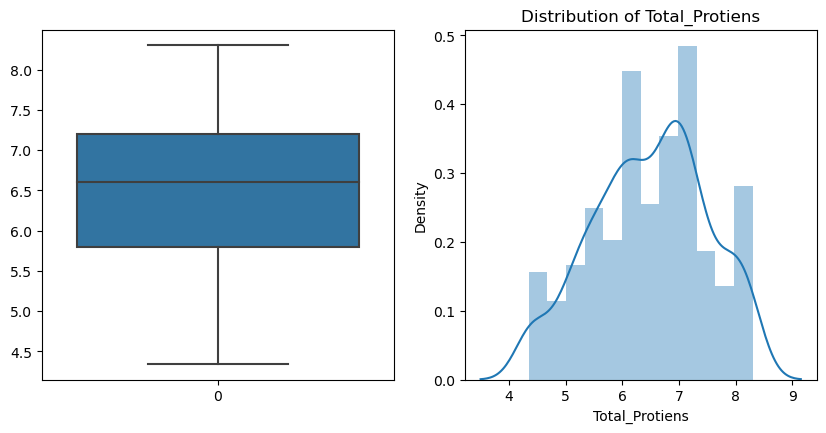

In [25]:
floor=df['Total_Protiens'].quantile(0.03)
ceil=df['Total_Protiens'].quantile(0.97)
print('floor value is',floor,'\n ceiling value is',ceil)
print('___'*50)
df['Total_Protiens']=np.where(df['Total_Protiens']>ceil,ceil,
                               np.where(df['Total_Protiens']<floor,floor,df['Total_Protiens']))
print(df['Total_Protiens'],'___'*50)

figure=plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(df['Total_Protiens'])
plt.subplot(2,2,2)
sns.distplot(df['Total_Protiens'])
plt.title('Distribution of Total_Protiens')
plt.plot
plt.show()

floor value is 0.4 
 ceiling value is 1.6
______________________________________________________________________________________________________________________________________________________
0      0.90
1      0.74
2      0.89
3      1.00
4      0.40
       ... 
578    0.40
579    1.10
580    1.00
581    1.00
582    1.50
Name: Albumin_and_Globulin_Ratio, Length: 583, dtype: float64 ______________________________________________________________________________________________________________________________________________________


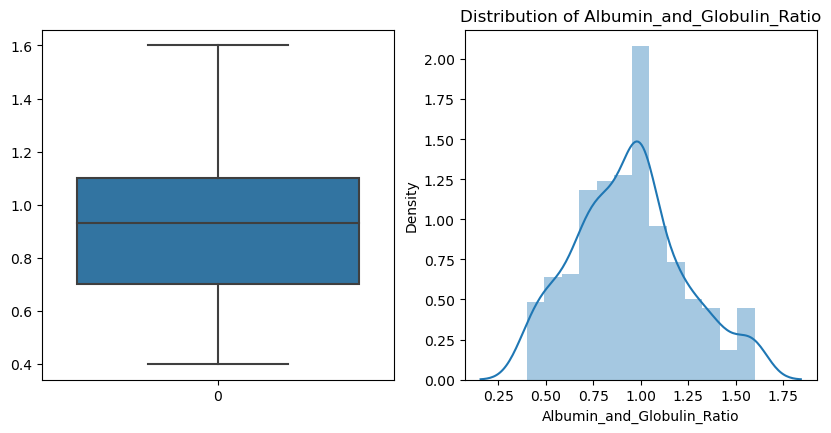

In [26]:

floor=df['Albumin_and_Globulin_Ratio'].quantile(0.03)
ceil=df['Albumin_and_Globulin_Ratio'].quantile(0.97)
print('floor value is',floor,'\n ceiling value is',ceil)
print('___'*50)
df['Albumin_and_Globulin_Ratio']=np.where(df['Albumin_and_Globulin_Ratio']>ceil,ceil,
                               np.where(df['Albumin_and_Globulin_Ratio']<floor,floor,df['Albumin_and_Globulin_Ratio']))
print(df['Albumin_and_Globulin_Ratio'],'___'*50)

figure=plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(df['Albumin_and_Globulin_Ratio'])
plt.subplot(2,2,2)
sns.distplot(df['Albumin_and_Globulin_Ratio'])
plt.title('Distribution of Albumin_and_Globulin_Ratio')
plt.plot
plt.show()

In [27]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [28]:
df.groupby('Dataset').median()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
Dataset,,,,,,,,,
0,40.0,0.8,0.2,186.0,27.0,29.0,6.60,3.4,1.0
1,46.0,1.4,0.5,229.0,41.0,53.0,6.55,3.0,0.9


In [29]:
df['Direct_Bilirubin']=df['Direct_Bilirubin'].replace(np.nan,df['Direct_Bilirubin'].median())
df['Alkaline_Phosphotase']=df['Alkaline_Phosphotase'].replace(np.nan,df['Alkaline_Phosphotase'].median())
df['Alamine_Aminotransferase']=df['Alamine_Aminotransferase'].replace(np.nan,df['Alamine_Aminotransferase'].median())
df['Aspartate_Aminotransferase']=df['Aspartate_Aminotransferase'].replace(np.nan,df['Aspartate_Aminotransferase'].median())
df['Albumin']=df['Albumin'].replace(np.nan,df['Albumin'].median())
df['Albumin_and_Globulin_Ratio']=df['Albumin_and_Globulin_Ratio'].replace(np.nan,df['Albumin_and_Globulin_Ratio'].median())

In [30]:
df.isnull().sum()

Age                           0
Gender                        3
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [31]:
df.shape

(583, 11)

In [32]:
df.Gender.unique()

array(['Female', 'Male', nan, 'dsfsf'], dtype=object)

In [33]:
df.Gender.value_counts()

Male      439
Female    140
dsfsf       1
Name: Gender, dtype: int64

In [34]:
print('unique values in Gender column',df.Gender.unique())
df['Gender']=df['Gender'].replace({'dsfsf':None,'Male':1,'Female':0})
df.isnull().sum()

unique values in Gender column ['Female' 'Male' nan 'dsfsf']


Age                           0
Gender                        4
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [35]:
df['Gender'].unique()

array([ 0.,  1., nan])

In [36]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62,1.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62,1.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58,1.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72,1.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [37]:
from sklearn.impute import KNNImputer
impute=KNNImputer(n_neighbors=10)
df2=impute.fit_transform(df)

In [38]:
print(df2.shape)
df2

(583, 11)


array([[65.  ,  0.  ,  0.7 , ...,  3.3 ,  0.9 ,  1.  ],
       [62.  ,  1.  , 10.9 , ...,  3.2 ,  0.74,  1.  ],
       [62.  ,  1.  ,  7.3 , ...,  3.3 ,  0.89,  1.  ],
       ...,
       [52.  ,  1.  ,  0.8 , ...,  3.2 ,  1.  ,  1.  ],
       [31.  ,  1.  ,  1.3 , ...,  3.4 ,  1.  ,  1.  ],
       [38.  ,  1.  ,  1.  , ...,  4.4 ,  1.5 ,  0.  ]])

In [39]:
df.columns.to_list()

['Age',
 'Gender',
 'Total_Bilirubin',
 'Direct_Bilirubin',
 'Alkaline_Phosphotase',
 'Alamine_Aminotransferase',
 'Aspartate_Aminotransferase',
 'Total_Protiens',
 'Albumin',
 'Albumin_and_Globulin_Ratio',
 'Dataset']

In [40]:
columns=['Age',
 'Gender',
 'Total_Bilirubin',
 'Direct_Bilirubin',
 'Alkaline_Phosphotase',
 'Alamine_Aminotransferase',
 'Aspartate_Aminotransferase',
 'Total_Protiens',
 'Albumin',
 'Albumin_and_Globulin_Ratio','Dataset']

In [41]:
df2=pd.DataFrame(df2,columns=['Age','Gender',
'Total_Bilirubin',
'Direct_Bilirubin',
'Alkaline_Phosphotase',
'Alamine_Aminotransferase',
'Aspartate_Aminotransferase',
'Total_Protiens',
'Albumin',
'Albumin_and_Globulin_Ratio','Dataset'])

In [42]:
df2.Gender.unique()

array([0. , 1. , 0.8, 0.9, 0.4, 0.7])

In [43]:
df2['Gender']=df2['Gender'].replace({0.0:0,1.0:1,0.9:1,0.8:1,0.7:0,0.4:0})
df2.Gender.unique()

array([0., 1.])

In [44]:
df2.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [45]:
X=df2.iloc[:,:-1]
y=df2.iloc[:,-1]
print(X.shape)
print(y.shape)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print('shape of X-train',X_train.shape)
print('shape of X-test',X_test.shape)
print('shape of y_train',y_train.shape) 
print('shape of y_test',y_test.shape,'\n')
print("____"*30)

(583, 10)
(583,)
shape of X-train (466, 10)
shape of X-test (117, 10)
shape of y_train (466,)
shape of y_test (117,) 

________________________________________________________________________________________________________________________


In [46]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mms=MinMaxScaler()
mms.fit_transform(X_train,X_test)

array([[0.79012346, 0.        , 0.        , ..., 0.06423875, 0.26086957,
        0.33333333],
       [0.33333333, 1.        , 0.03588271, ..., 0.62063733, 0.54347826,
        0.5       ],
       [0.2962963 , 1.        , 0.0102522 , ..., 0.        , 0.32608696,
        0.83333333],
       ...,
       [0.40740741, 1.        , 0.0051261 , ..., 1.        , 0.86956522,
        0.5       ],
       [0.16049383, 0.        , 0.        , ..., 0.69650986, 0.7826087 ,
        1.        ],
       [0.16049383, 1.        , 0.01537831, ..., 0.64592817, 0.7173913 ,
        0.95833333]])

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [48]:
rf = RandomForestClassifier(max_depth=2,max_features=0.4,max_samples=0.5,n_estimators=60,random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, max_features=0.4, max_samples=0.5,
                       n_estimators=60, random_state=42)

### Accuracy score of training data

In [49]:
rf_train=rf.predict(X_train)

In [50]:
rf_acc=accuracy_score(rf_train,y_train)

In [51]:
print("Accuracy of train data",rf_acc)

Accuracy of train data 0.723175965665236


### Accuracy of test data

In [52]:
y_pred=rf.predict(X_test)

In [53]:
test_acc=accuracy_score(y_pred,y_test)

In [54]:
print("Test data accuracy:",test_acc)

Test data accuracy: 0.7521367521367521


In [55]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [56]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [57]:
Xtrain_acc=xgb.predict(X_train)
train_data_acc=accuracy_score(Xtrain_acc,y_train)
print("Accuracy of train data",train_data_acc)

Accuracy of train data 1.0


In [58]:
X_test_pred=xgb.predict(X_test)
test_acc=accuracy_score(X_test_pred,y_test)
print("Test data accuracy:",test_acc)

Test data accuracy: 0.7094017094017094


In [59]:
from sklearn.model_selection import cross_val_score,RandomizedSearchCV,GridSearchCV
cvs=cross_val_score(RandomForestClassifier(max_samples=0.75),X,y,cv=10,scoring='accuracy')
print(cvs.mean())

0.7050263004091175


### H.P_tuning

### Random_search_cv

In [60]:
n_estimators=[20,40,60,80,100,120]
max_features=[0.2,0.4,0.6,0.8,1.0]
max_depth=[2,8,None]
max_samples=[0.5,0.75,1]
bootstrap=[True,False]
min_samples_split=[2,5]
min_sample_leaf=[1,2]

param_grid={'n_estimators':n_estimators,
           'max_features':max_features,
           'max_depth':max_depth,
           'max_samples':max_samples}
print(param_grid)

{'n_estimators': [20, 40, 60, 80, 100, 120], 'max_features': [0.2, 0.4, 0.6, 0.8, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1]}


In [61]:
rf_grid= RandomizedSearchCV(estimator=rf,
                     param_distributions=param_grid,
                     cv=5,
                     verbose=2,
                     n_jobs=-1)

In [62]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=2,
                                                    max_features=0.4,
                                                    max_samples=0.5,
                                                    n_estimators=60,
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 8, None],
                                        'max_features': [0.2, 0.4, 0.6, 0.8,
                                                         1.0],
                                        'max_samples': [0.5, 0.75, 1],
                                        'n_estimators': [20, 40, 60, 80, 100,
                                                         120]},
                   verbose=2)

In [63]:
rf_grid.best_params_

{'n_estimators': 80, 'max_samples': 1, 'max_features': 0.4, 'max_depth': 8}

In [64]:
rf_grid.best_score_

0.7060169297643561

#  predictive system

In [65]:
input=(17,1,0.9,0.3,202,22,19,7.4,4.1,1.2)
data=np.asarray(input)
reshape_data=data.reshape(1,-1)
# normalise data
nor_data=mms.fit_transform(reshape_data)
print(nor_data)
prediction=rf.predict(nor_data)
print(prediction)

if (prediction==0):
    print("You are healthy")
else:
    print("you have liver disease ")

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0.]
You are healthy


### saving model

In [66]:
import os,pickle
file='Trained_model.pkl'
pickle.dump(rf,open(file,'wb'))


In [67]:
#loading saved model
load_model=pickle.load(open('Trained_model.pkl','rb'))

In [68]:
input=(17,1,0.9,0.3,202,22,19,7.4,4.1,1.2)
data=np.asarray(input)
reshape_data=data.reshape(1,-1)
# normalise data
nor_data=mms.fit_transform(reshape_data)
print(nor_data)
prediction=rf.predict(nor_data)
print(prediction)

if (prediction==0):
    print("You are healthy")
else:
    print("you have liver disease ")

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0.]
You are healthy
